In [1]:
# Import libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('Fraud_check.csv')
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [4]:
# EDA

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [6]:
df.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [7]:
df.describe(include = 'O')

,Undergrad,Marital.Status,Urban
count,600,600,600
unique,2,3,2
top,YES,Single,YES
freq,312,217,302


In [8]:
df.isna().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [9]:
df[df.duplicated()]

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban


In [10]:
# Data Visualization

In [12]:
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 250

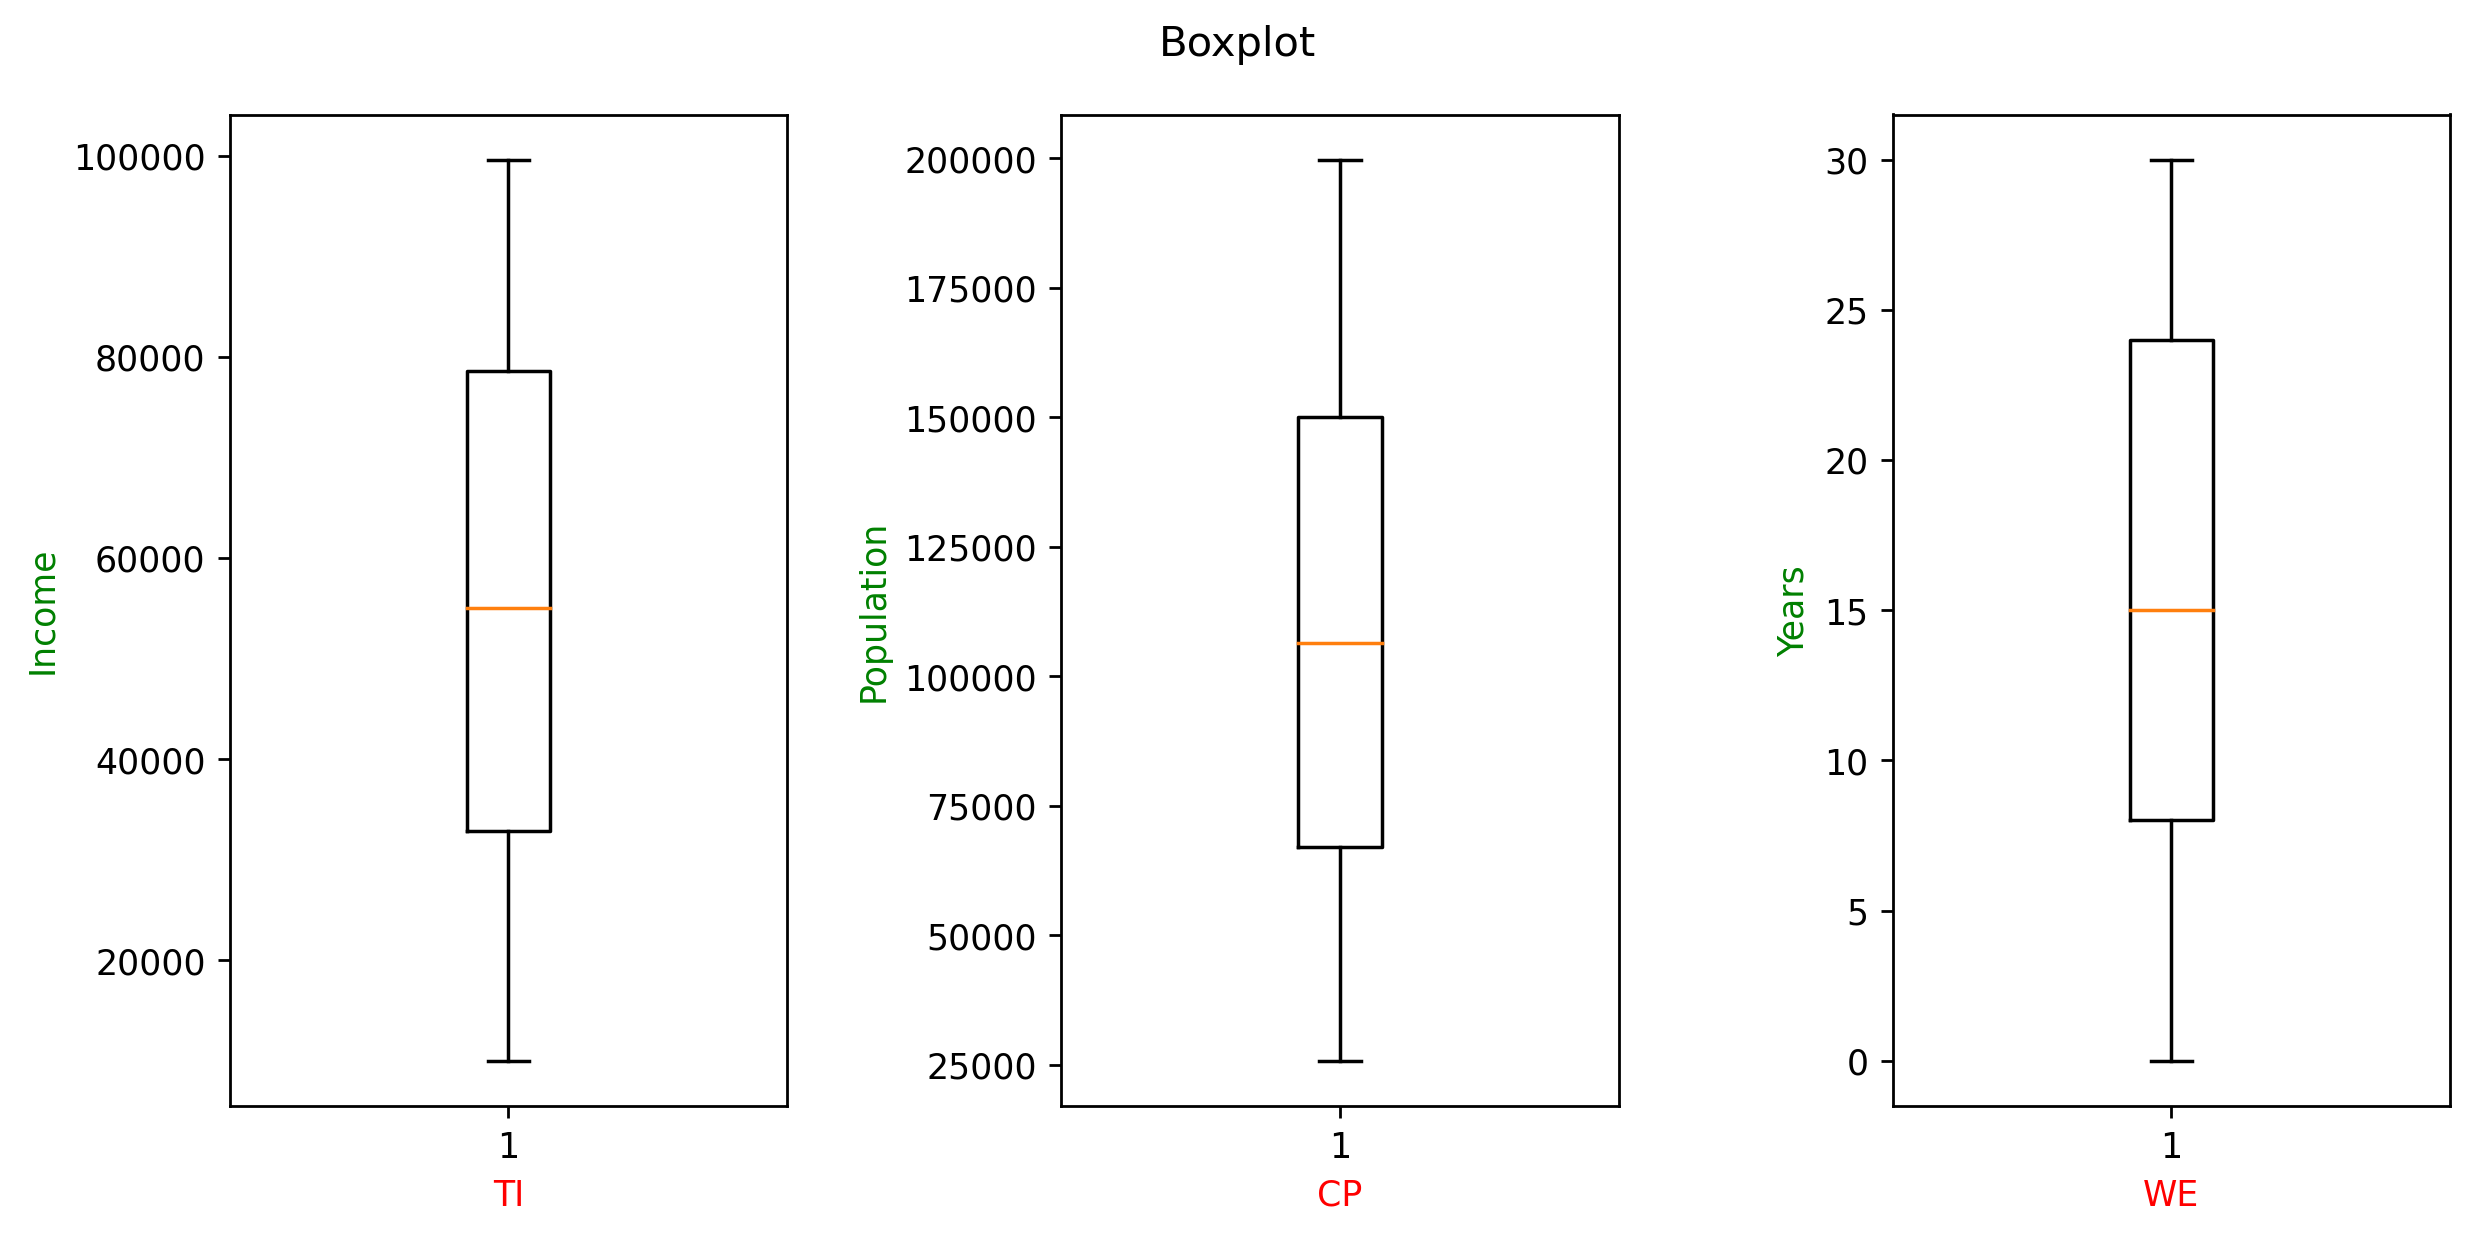

In [14]:
plt.suptitle('Boxplot')
plt.subplot(1,3,1)
plt.boxplot(df['Taxable.Income'])
plt.xlabel('TI', c = 'r')
plt.ylabel('Income', c = 'g')

plt.subplot(1,3,2)
plt.boxplot(df['City.Population'])
plt.xlabel('CP', c = 'r')
plt.ylabel('Population', c = 'g')

plt.subplot(1,3,3)
plt.boxplot(df['Work.Experience'])
plt.xlabel('WE', c = 'r')
plt.ylabel('Years', c = 'g')
plt.tight_layout(w_pad = 2)

Text(0.5, 1.0, 'Undergrad')

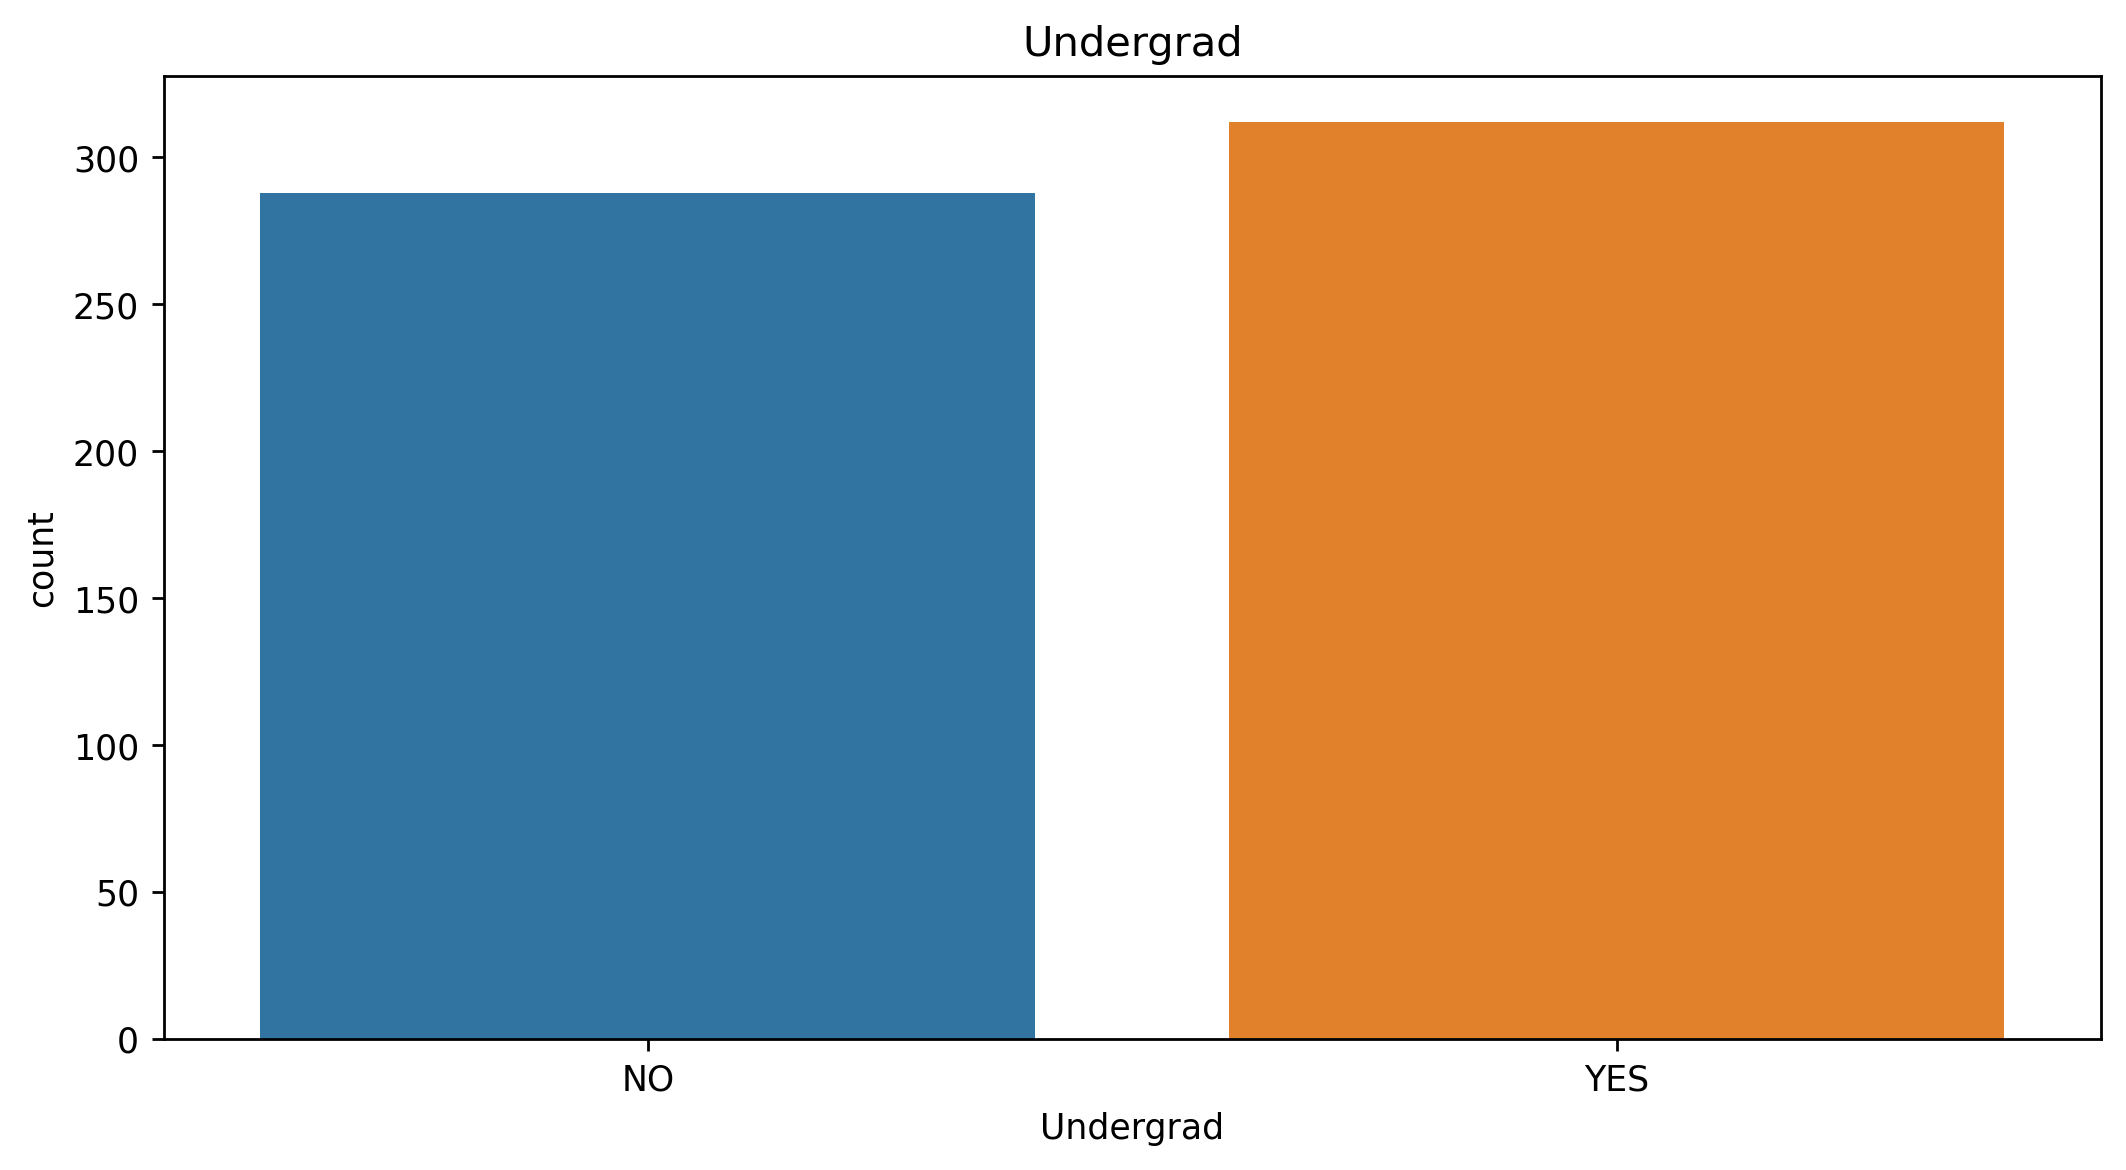

In [15]:
sns.countplot(df['Undergrad'])
plt.title('Undergrad')

Text(0.5, 1.0, 'Marital Status')

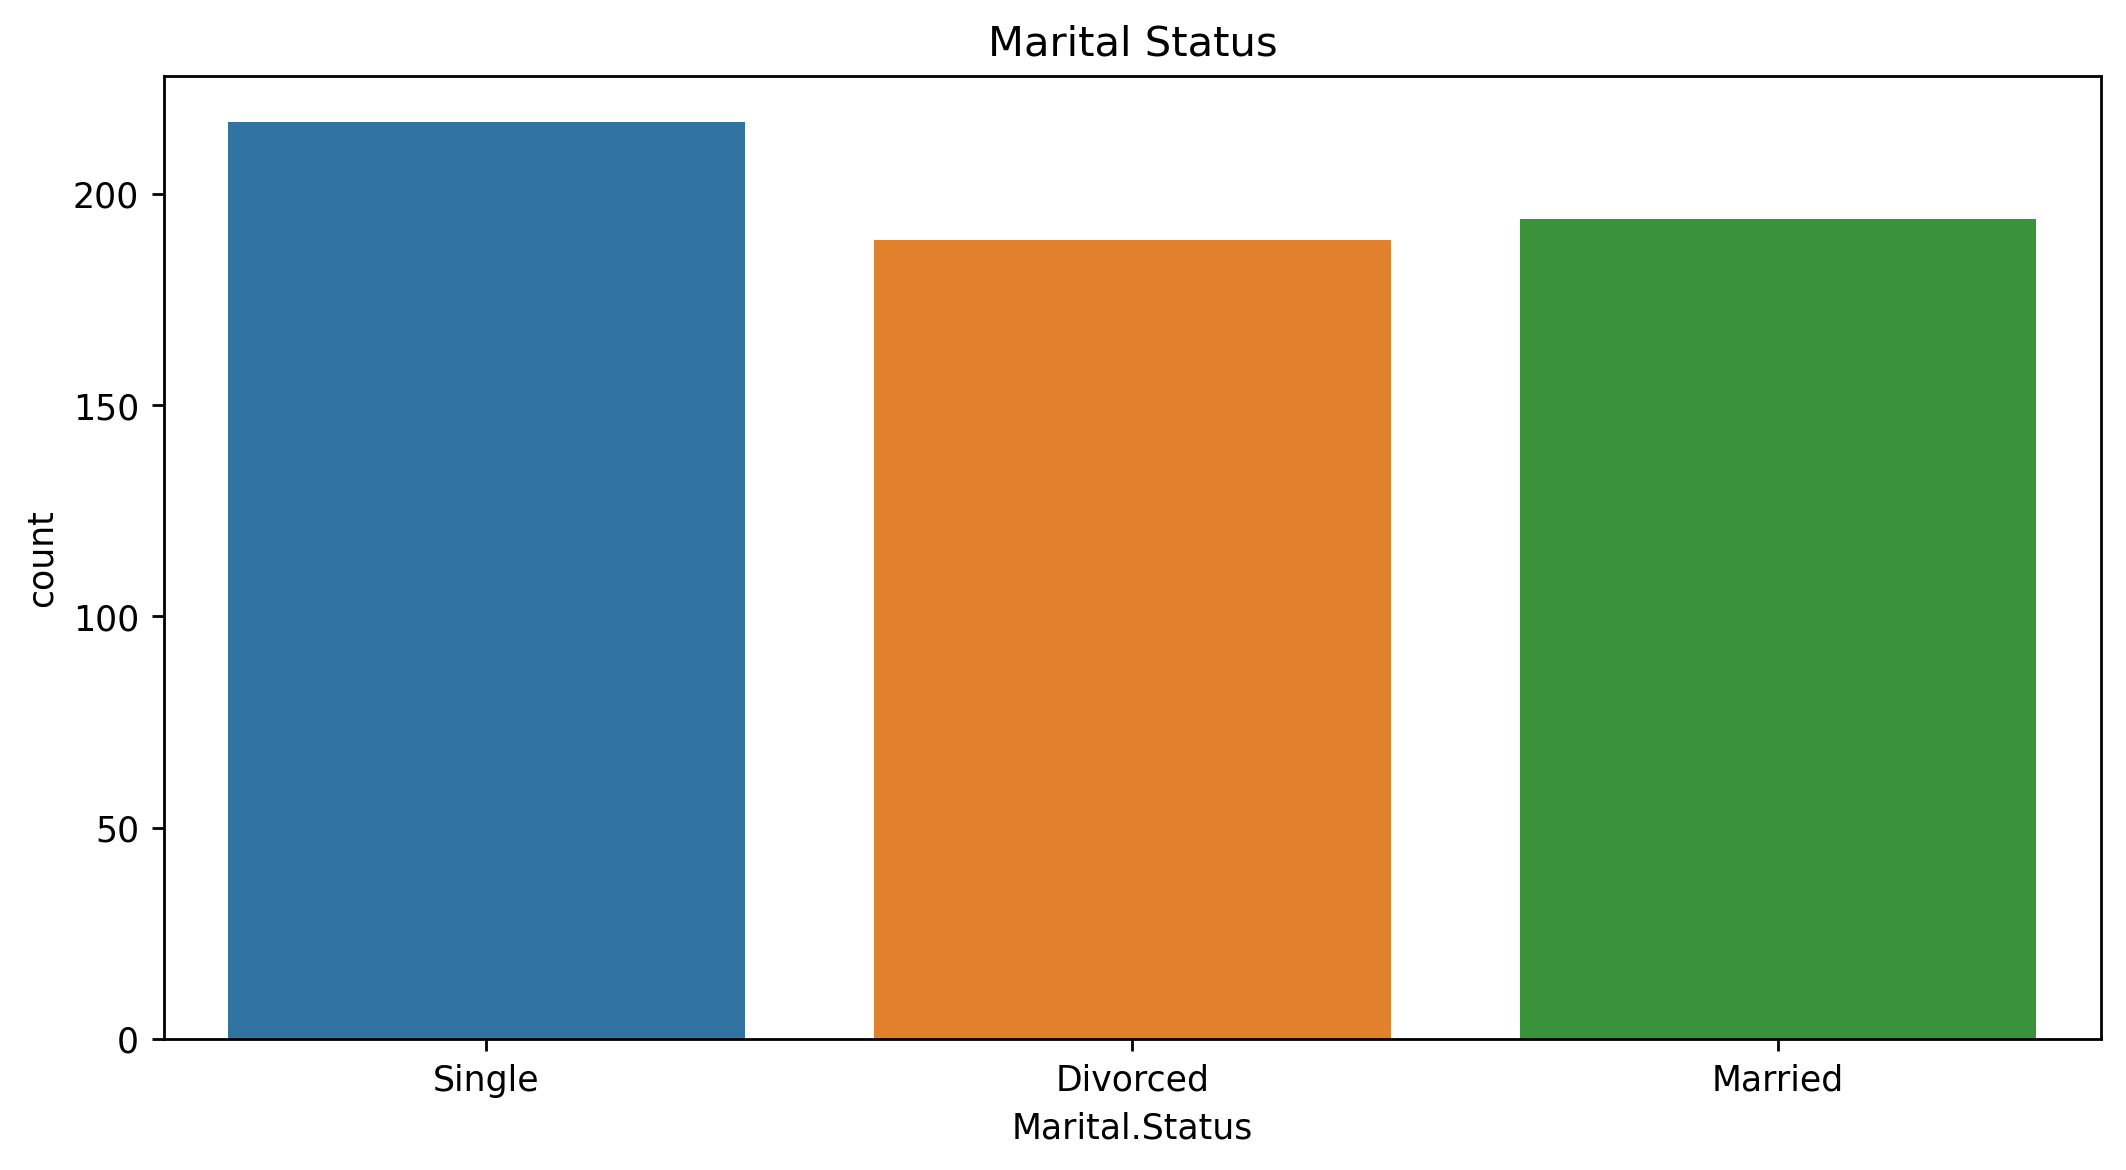

In [16]:
sns.countplot(df['Marital.Status'])
plt.title('Marital Status')

Text(0.5, 1.0, 'Urban')

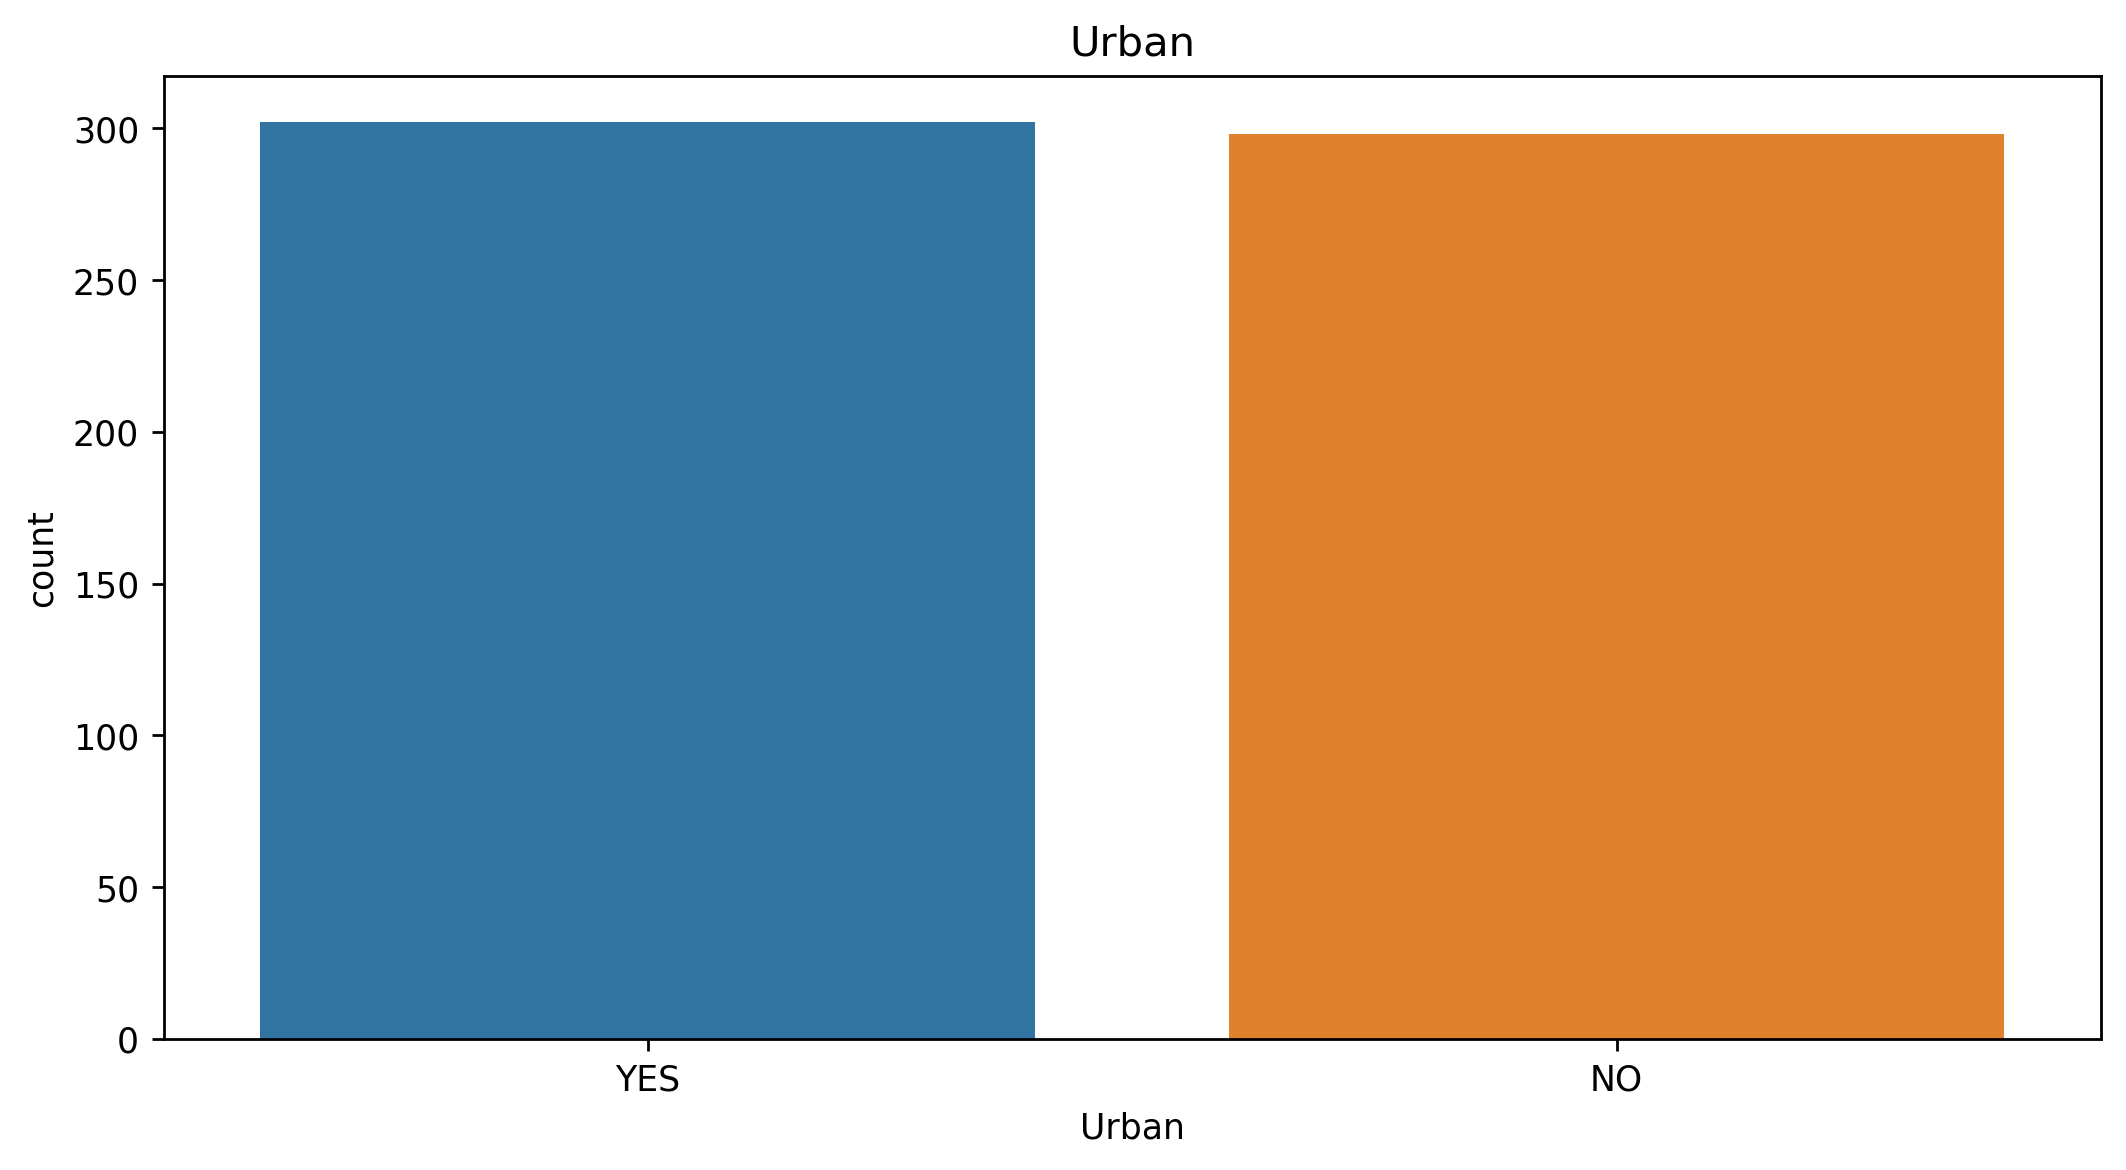

In [17]:
sns.countplot(df['Urban'])
plt.title('Urban')

In [18]:
df.corr()

,Taxable.Income,City.Population,Work.Experience
Taxable.Income,1.000000,-0.064387,-0.001818
City.Population,-0.064387,1.000000,0.013135
Work.Experience,-0.001818,0.013135,1.000000


<AxesSubplot:>

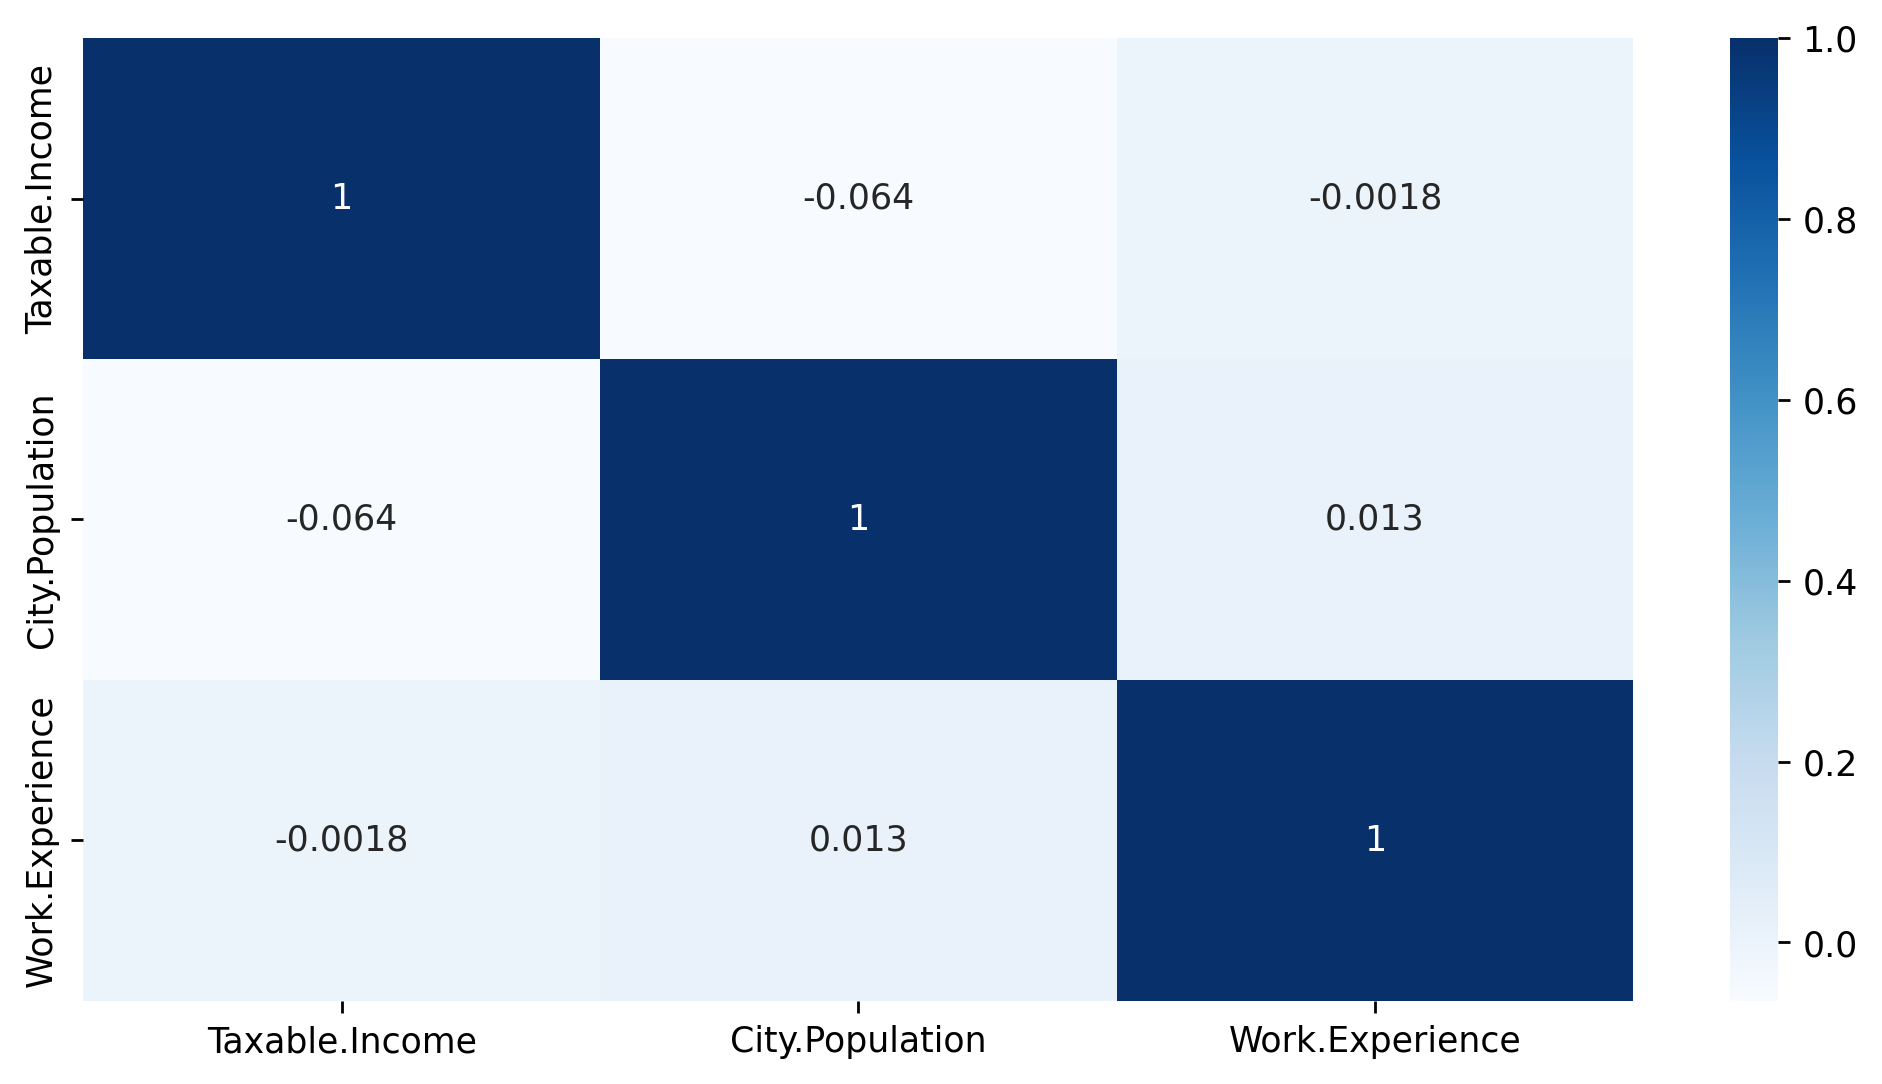

In [19]:
sns.heatmap(df.corr(), annot = True, cmap = 'Blues')

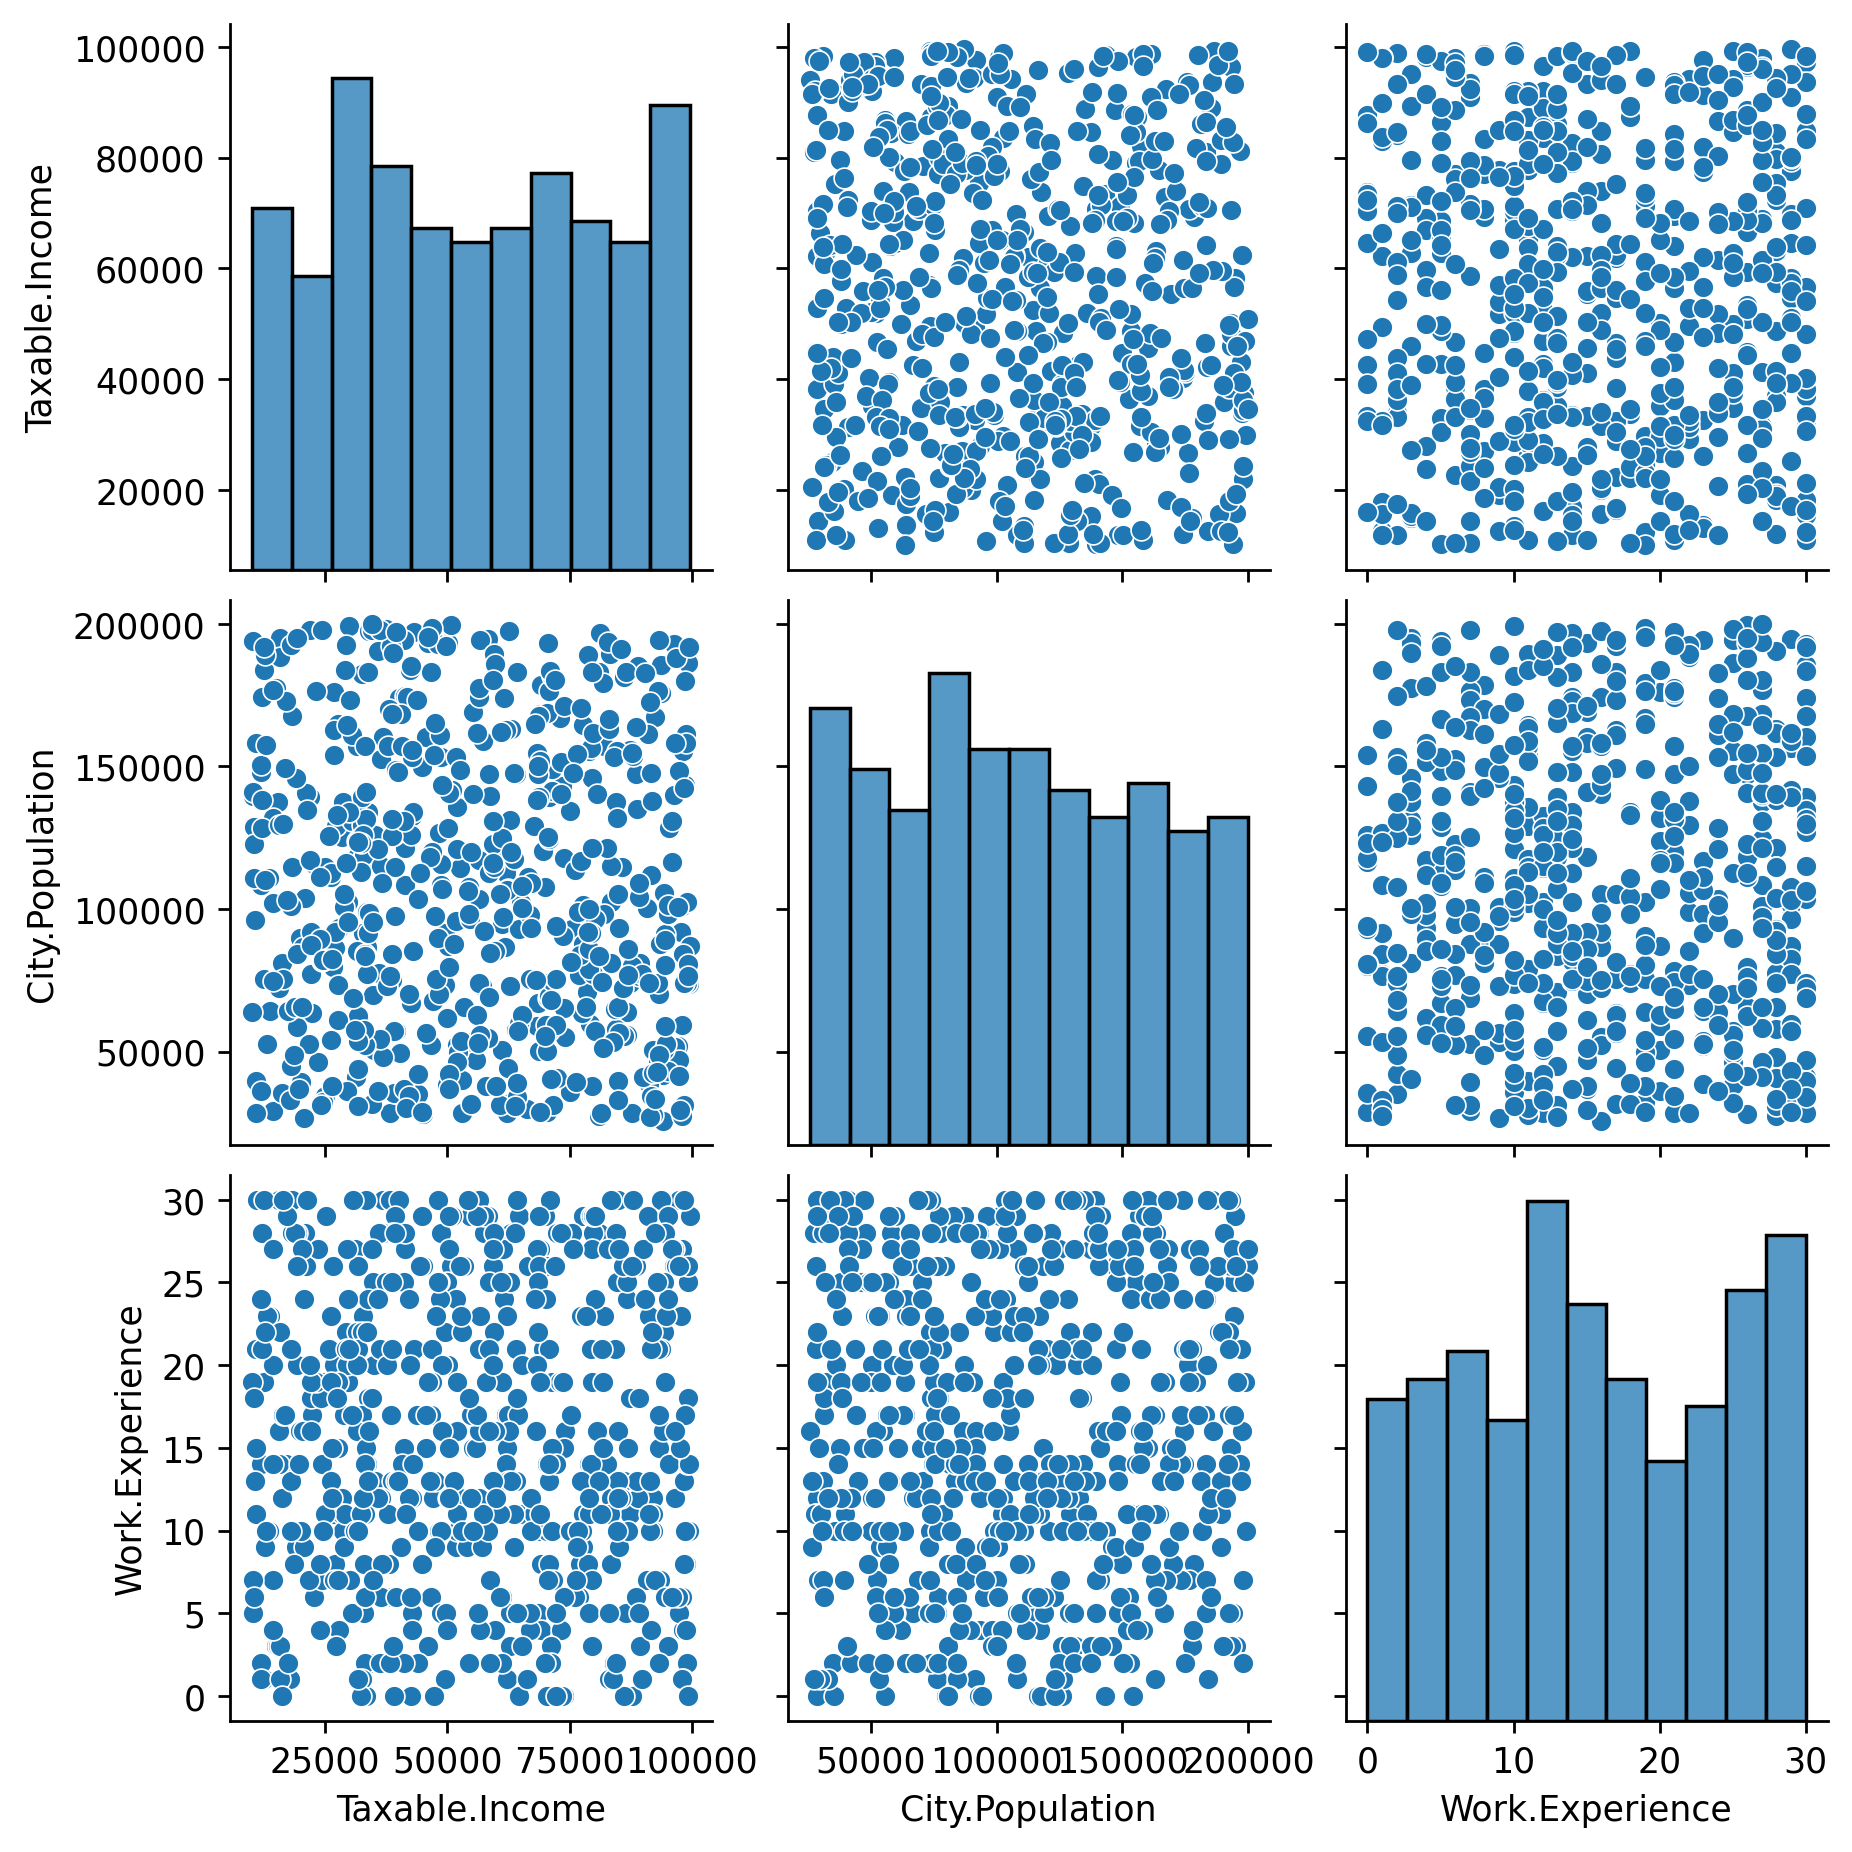

In [20]:
sns.pairplot(df)

In [21]:
# Treating those who have taxable_income <= 30000 as "Risky" and others are "Good"

In [22]:
Fraud = []

for i in df['Taxable.Income']:
    if i <= 30000:
        Fraud.append('Risky')
    else:
        Fraud.append('Good')

In [23]:
Fraud

['Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Risky',
 'Good',
 'Risky',
 'Good',
 'Good',
 'Good',
 'Risky',
 'Good',
 'Good',
 'Risky',
 'Good',
 'Risky',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Risky',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Risky',
 'Good',
 'Risky',
 'Good',
 'Risky',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Risky',
 'Good',
 'Good',
 'Good',
 'Good',
 'Risky',
 'Good',
 'Risky',
 'Good',
 'Good',
 'Risky',
 'Good',
 'Good',
 'Risky',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Risky',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Risky',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Risky',
 'Good',
 'Risky',
 'Good',
 'Risky',
 'Good',
 'Good',
 'Good',
 'Risky',
 'Risky',
 'Good',
 'Risky',
 'Good',
 'Risky',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Risky',
 'Good',
 'Go

In [24]:
df['Fraud'] = Fraud
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Fraud
0,NO,Single,68833,50047,10,YES,Good
1,YES,Divorced,33700,134075,18,YES,Good
2,NO,Married,36925,160205,30,YES,Good
3,YES,Single,50190,193264,15,YES,Good
4,NO,Married,81002,27533,28,NO,Good
...,...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES,Good
596,YES,Divorced,69967,55369,2,YES,Good
597,NO,Divorced,47334,154058,0,YES,Good
598,YES,Married,98592,180083,17,NO,Good


In [25]:
df[df['Taxable.Income'] <= 30000]

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Fraud
10,NO,Single,29732,102602,19,YES,Risky
12,NO,Divorced,11794,148033,14,YES,Risky
16,YES,Divorced,24987,34551,29,NO,Risky
19,NO,Single,10987,126953,30,YES,Risky
21,YES,Divorced,14310,29106,7,YES,Risky
...,...,...,...,...,...,...,...
544,NO,Single,29916,133877,21,YES,Risky
557,YES,Married,12810,157421,10,NO,Risky
567,YES,Single,16316,129912,30,NO,Risky
575,NO,Divorced,10735,95975,13,YES,Risky


In [26]:
# Ordinal encoading for independent variables

In [27]:
oe = OrdinalEncoder()

df[['Undergrad', 'Marital.Status', 'Urban']] = oe.fit_transform(df[['Undergrad', 'Marital.Status', 'Urban']])

In [28]:
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Fraud
0,0.0,2.0,68833,50047,10,1.0,Good
1,1.0,0.0,33700,134075,18,1.0,Good
2,0.0,1.0,36925,160205,30,1.0,Good
3,1.0,2.0,50190,193264,15,1.0,Good
4,0.0,1.0,81002,27533,28,0.0,Good
...,...,...,...,...,...,...,...
595,1.0,0.0,76340,39492,7,1.0,Good
596,1.0,0.0,69967,55369,2,1.0,Good
597,0.0,0.0,47334,154058,0,1.0,Good
598,1.0,1.0,98592,180083,17,0.0,Good


In [29]:
# Model Building

In [30]:
x = df.iloc[:,0:-1]
y = df['Fraud']

In [31]:
# Label encoading for target variable.

le = LabelEncoder()

le.fit_transform(y)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,

In [32]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size = 0.2, random_state = 1)

In [33]:
# Using C5.0

In [34]:
dt = DecisionTreeClassifier(criterion='entropy')

dt.fit(xtrain,ytrain)

ypred = dt.predict(xtest)

print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

        Good       1.00      1.00      1.00        97
       Risky       1.00      1.00      1.00        23

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120



In [35]:
print('Training Accuracy: ', dt.score(xtrain,ytrain))
print('Testing Accuracy: ', dt.score(xtest,ytest))

Training Accuracy:  1.0
Testing Accuracy:  1.0


In [36]:
# Decision Tree

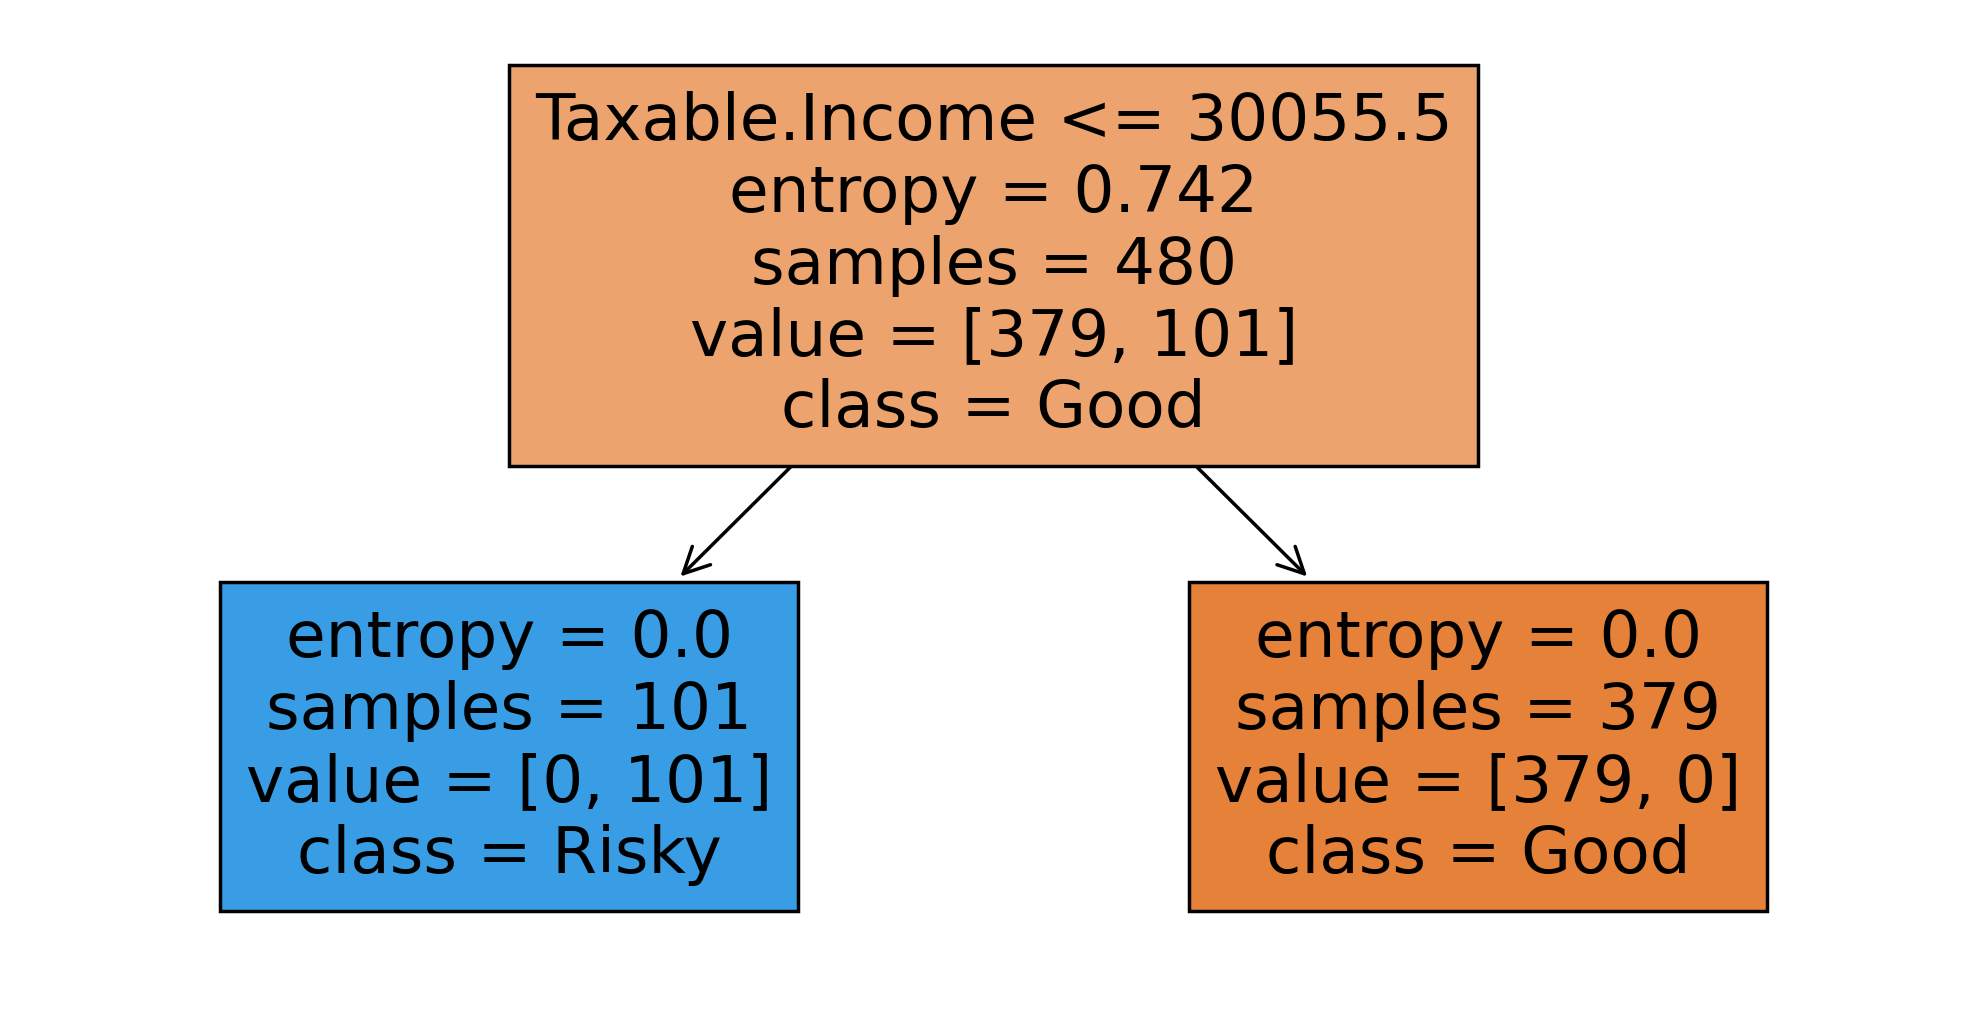

In [37]:
tree.plot_tree(dt, feature_names = x.columns, class_names = df['Fraud'].unique(), filled = True)
plt.show()

In [38]:
# Using CART - gini impurities

In [39]:
dt1 = DecisionTreeClassifier(criterion = 'gini')

dt1.fit(xtrain, ytrain)

yp = dt1.predict(xtest)

print(classification_report(ytest, yp))

              precision    recall  f1-score   support

        Good       1.00      1.00      1.00        97
       Risky       1.00      1.00      1.00        23

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120



In [40]:
print('Training Accuracy: ', dt1.score(xtrain, ytrain))
print('Testing Accuracy: ', dt1.score(xtest, ytest))

Training Accuracy:  1.0
Testing Accuracy:  1.0


In [41]:
# Decision Tree

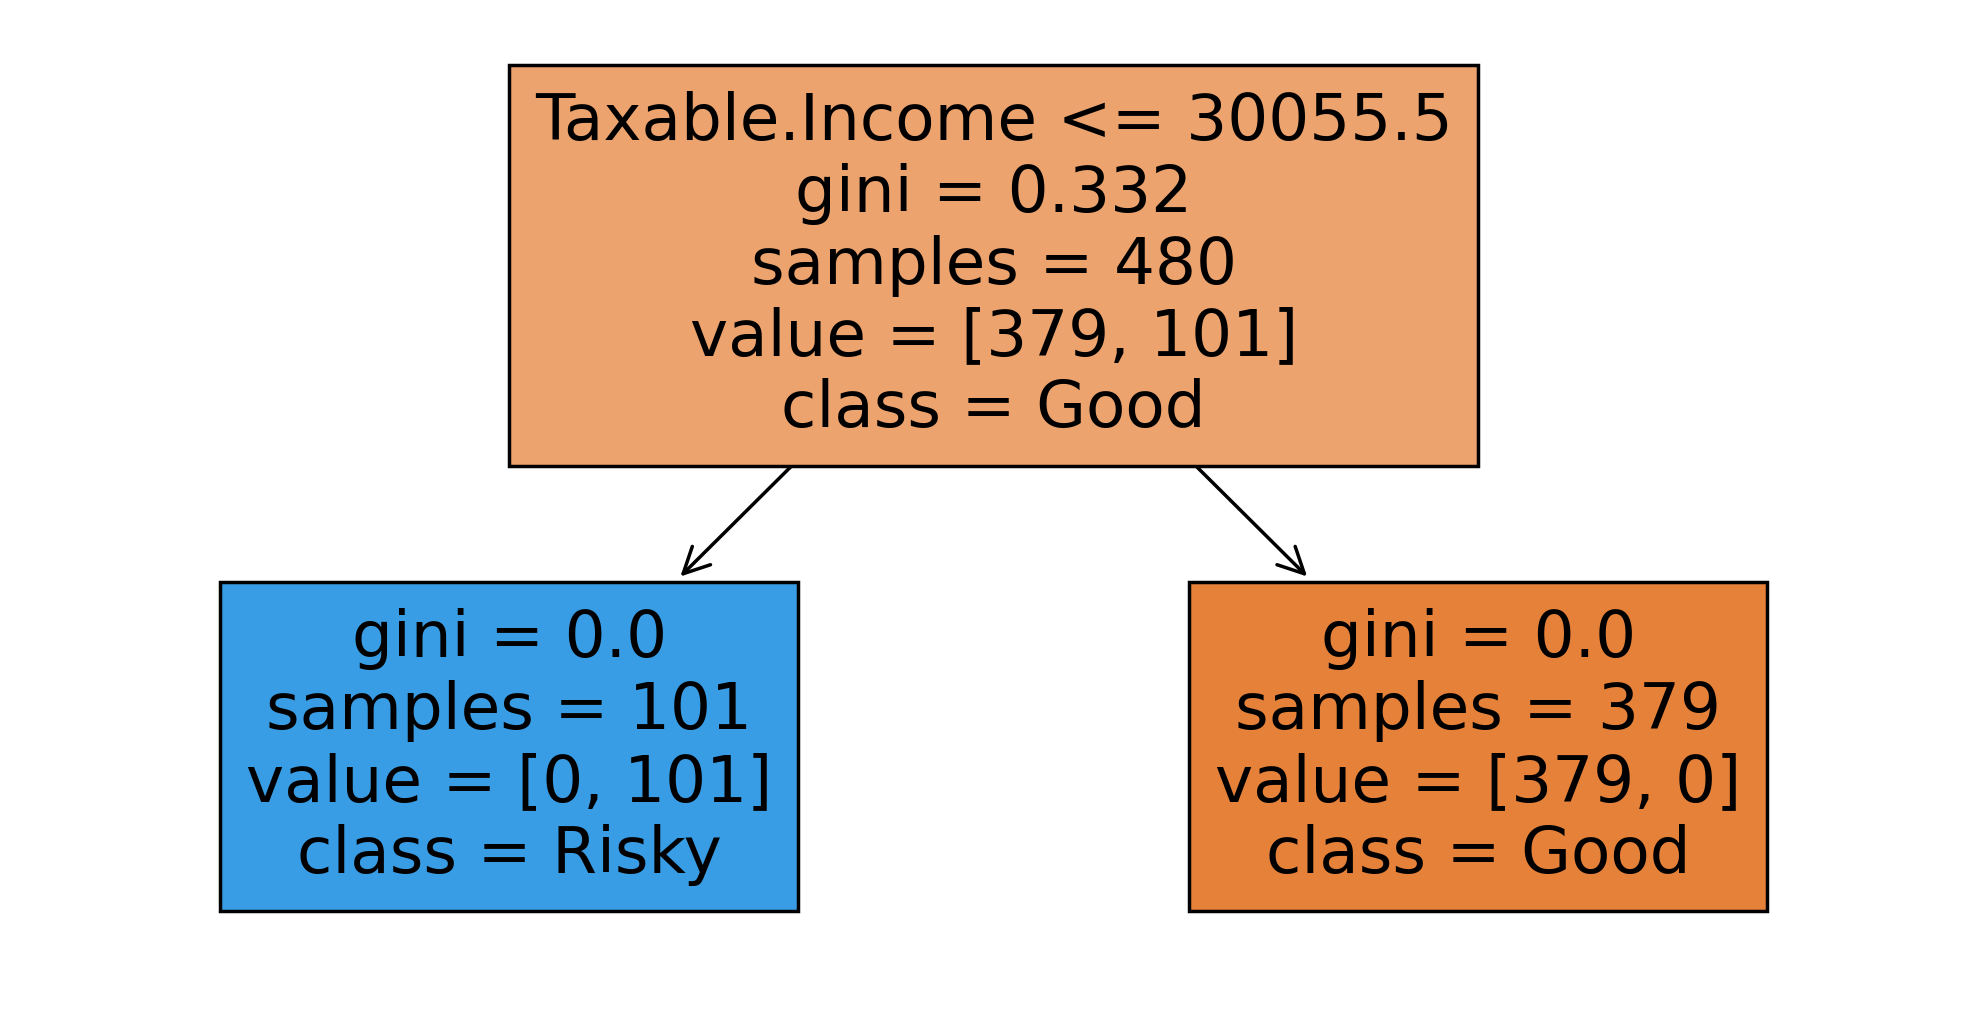

In [43]:
tree.plot_tree(dt1, feature_names = x.columns, class_names = df['Fraud'].unique(), filled = True)
plt.show()